# importing require libraries:

In [26]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.tree  import DecisionTreeClassifier,plot_tree
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

In [27]:
data = pd.read_csv("heart.csv")

In [28]:
data.head(10)

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0
5,58,0,0,100,248,0,0,122,0,1.0,1,0,2,1
6,58,1,0,114,318,0,2,140,0,4.4,0,3,1,0
7,55,1,0,160,289,0,0,145,1,0.8,1,1,3,0
8,46,1,0,120,249,0,0,144,0,0.8,2,0,3,0
9,54,1,0,122,286,0,0,116,1,3.2,1,2,2,0


In [29]:
Total_Rows = data.shape[0]
Total_Cols = data.shape[1]
print("Total Rows is :",Total_Rows)
print("Total columns is :", Total_Cols)


Total Rows is : 1025
Total columns is : 14


In [30]:
print( "\n Information about the Titanic dataset : \n " )
data.info()


 Information about the Titanic dataset : 
 
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1025 entries, 0 to 1024
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1025 non-null   int64  
 1   sex       1025 non-null   int64  
 2   cp        1025 non-null   int64  
 3   trestbps  1025 non-null   int64  
 4   chol      1025 non-null   int64  
 5   fbs       1025 non-null   int64  
 6   restecg   1025 non-null   int64  
 7   thalach   1025 non-null   int64  
 8   exang     1025 non-null   int64  
 9   oldpeak   1025 non-null   float64
 10  slope     1025 non-null   int64  
 11  ca        1025 non-null   int64  
 12  thal      1025 non-null   int64  
 13  target    1025 non-null   int64  
dtypes: float64(1), int64(13)
memory usage: 112.2 KB


## Columns distribution 

In [13]:
print("Total columns is here :\n", data.columns.tolist())

Total columns is here :
 ['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach', 'exang', 'oldpeak', 'slope', 'ca', 'thal', 'target']


In [31]:
numerical_col = data.select_dtypes(include=["int64","float64"]).columns
print("Total Numerical columns list is here :\n", numerical_col)
print("\nTotal Numerical columns is here :\n" ,numerical_col.value_counts().sum())

Total Numerical columns list is here :
 Index(['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach',
       'exang', 'oldpeak', 'slope', 'ca', 'thal', 'target'],
      dtype='object')

Total Numerical columns is here :
 14


In [16]:
categorical_col = data.select_dtypes(include=["O"]).columns
print("Total categorical columns  list is here :\n", categorical_col)
print("\nTotal categorical columns is here :\n" ,categorical_col.value_counts().sum())

Total categorical columns  list is here :
 Index([], dtype='object')

Total categorical columns is here :
 0


### its clear to all colums are numerical.

# Preprocessing : 

# 1. Handle null values:

In [32]:
data.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

its clearly watching you not missing value in dataset

### detect Outlines and Remove

In [33]:
for i in data:
    q1 = data[i].quantile(0.25)
    q3 = data[i].quantile(0.75)
    iqr = q3 - q1 
    lower = q1 - 1.5 * iqr
    upper = q3 + 1.5 * iqr
    data = data [(data[i] >= lower) & (data[i ] <= upper)]

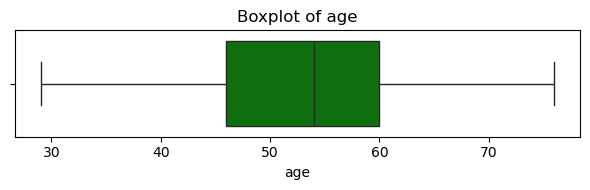

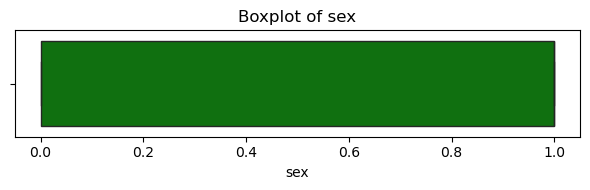

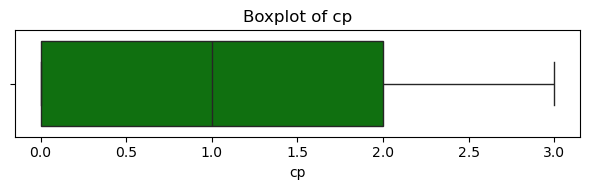

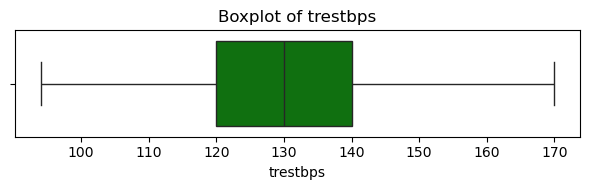

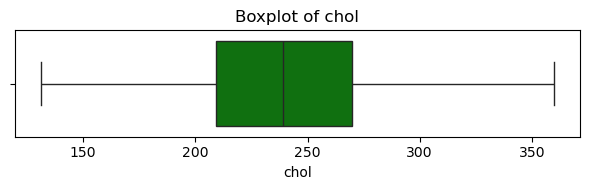

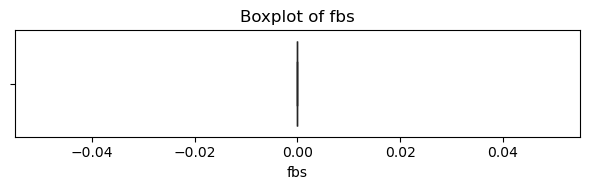

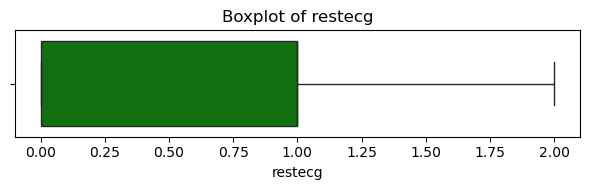

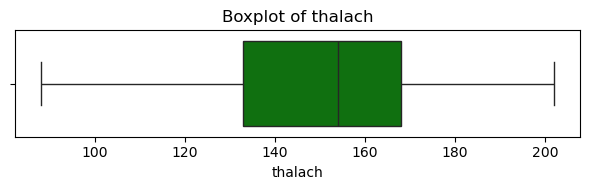

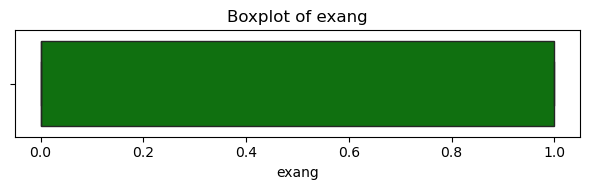

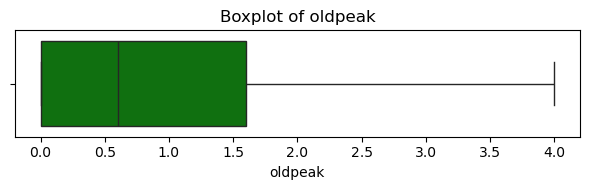

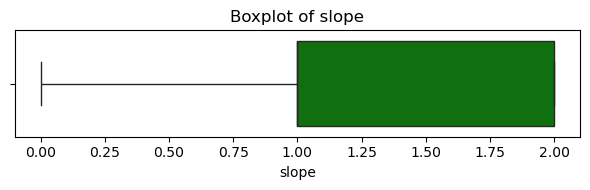

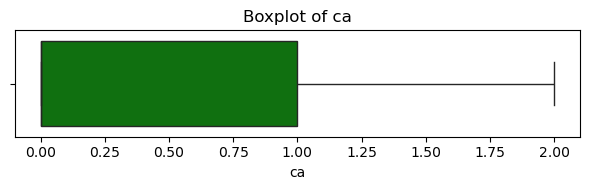

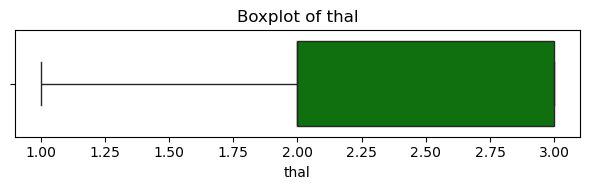

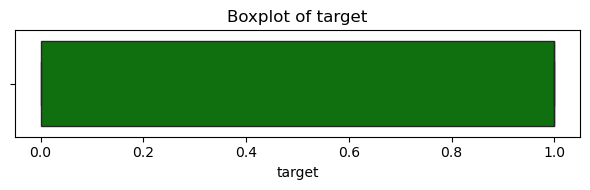

In [34]:
for col in data:
    plt.figure(figsize=(6, 2))
    sns.boxplot(x=data[col], color="green")
    plt.title(f"Boxplot of {col}")
    plt.tight_layout()
    plt.show()

### not outliers visible in data set.

# Feature Engineering:

In [35]:
from sklearn.model_selection import train_test_split

x = data.drop("target",axis=1)
y = data.target

x_train,x_test,y_train,y_test = train_test_split(x ,y, test_size=0.2 , random_state=42)


In [36]:
y.value_counts()

target
1    422
0    347
Name: count, dtype: int64

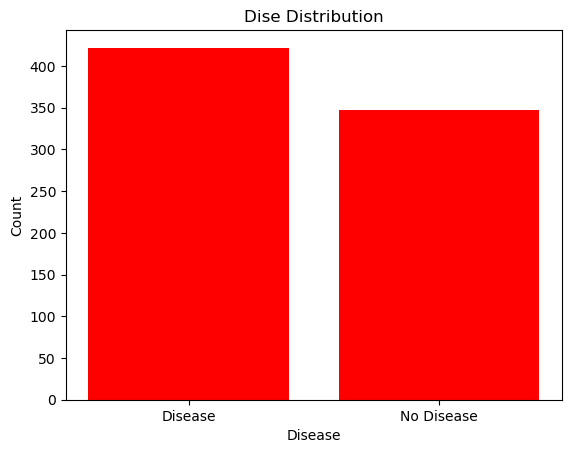

In [37]:
target_var = y.map({0: "No Disease", 1: "Disease"}).value_counts()

plt.bar(target_var.index, target_var.values, color="red")
plt.xlabel("Disease")
plt.ylabel("Count")
plt.title("Dise Distribution")
plt.show()

# Feature Scaling:

In [40]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)
data

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
5,58,0,0,100,248,0,0,122,0,1.0,1,0,2,1
7,55,1,0,160,289,0,0,145,1,0.8,1,1,3,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1020,59,1,1,140,221,0,1,164,1,0.0,2,0,2,1
1021,60,1,0,125,258,0,0,141,1,2.8,1,1,3,0
1022,47,1,0,110,275,0,0,118,1,1.0,1,1,2,0
1023,50,0,0,110,254,0,0,159,0,0.0,2,0,2,1


# 1 - import DecisionTreeClassifier model - Train the model and visualize

In [41]:
dt_model = DecisionTreeClassifier(random_state=42)

dt_model.fit(x_train,y_train)

DecisionTreeClassifier(random_state=42)

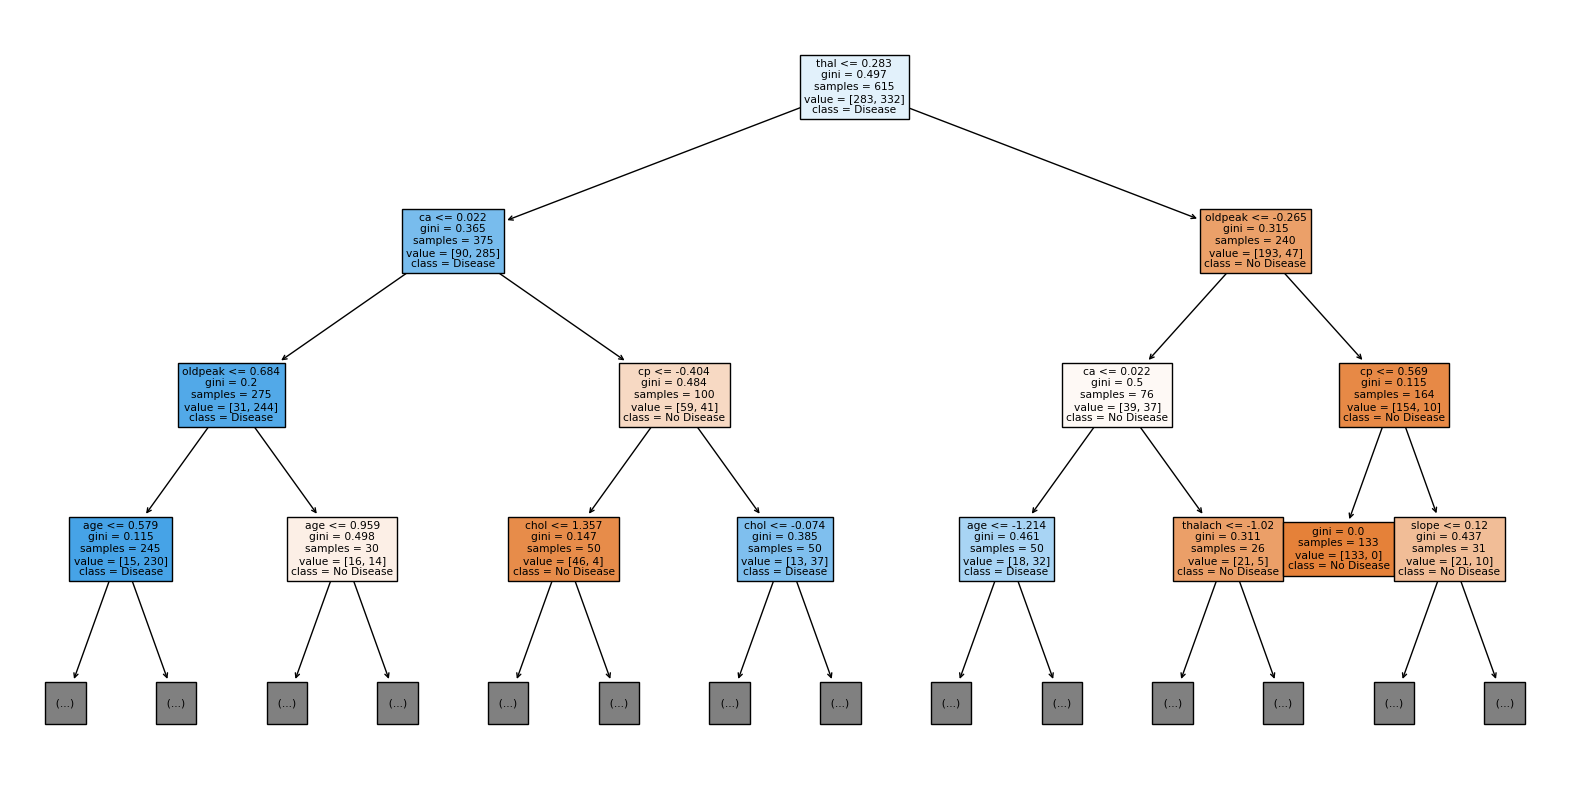

In [42]:
# Visualize the tree (small depth for clarity)
plt.figure(figsize=(20,10))
plot_tree(dt_model, feature_names=x.columns, class_names=["No Disease", "Disease"], filled=True, max_depth=3)
plt.show()

# 2 - Analyze overfitting and control tree depth

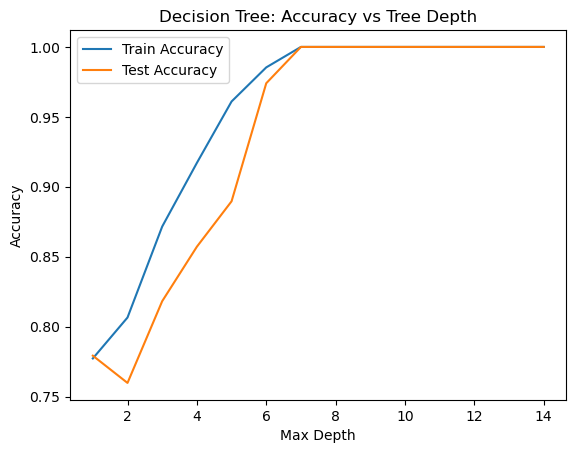

In [43]:
train_accuracy = []
test_accuracy = []
depths = range(1, 15)

for depth in depths:
    dt_model = DecisionTreeClassifier(max_depth=depth, random_state=42)
    dt_model.fit(x_train, y_train)
    train_accuracy.append(dt_model.score(x_train, y_train))
    test_accuracy.append(dt_model.score(x_test, y_test))

plt.plot(depths, train_accuracy, label="Train Accuracy")
plt.plot(depths, test_accuracy, label="Test Accuracy")
plt.xlabel("Max Depth")
plt.ylabel("Accuracy")
plt.legend()
plt.title("Decision Tree: Accuracy vs Tree Depth")
plt.show()


# 3 - Train a Random Forest and compare accuracy.

In [44]:
rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(x_train, y_train)

RandomForestClassifier(random_state=42)

In [45]:
dt_test_acc = dt_model.score(x_test, y_test) 
rf_test_acc = rf_model.score(x_test, y_test)

print(f"Decision Tree Test Accuracy: {dt_test_acc:.2f}")
print(f"Random Forest Test Accuracy: {rf_test_acc:.2f}")

Decision Tree Test Accuracy: 1.00
Random Forest Test Accuracy: 1.00


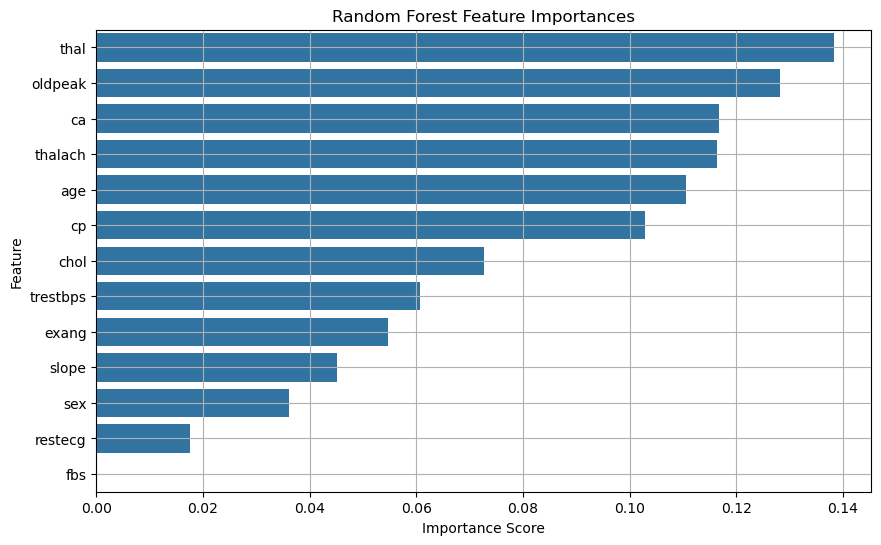

In [46]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

rf_importances = pd.Series(rf_model.feature_importances_, index=x.columns).sort_values(ascending=False)

# Plot
plt.figure(figsize=(10,6))
sns.barplot(x=rf_importances, y=rf_importances.index)
plt.title("Random Forest Feature Importances")
plt.xlabel("Importance Score")
plt.ylabel("Feature")
plt.grid(True)
plt.show()


# 4 - Interpret feature importances

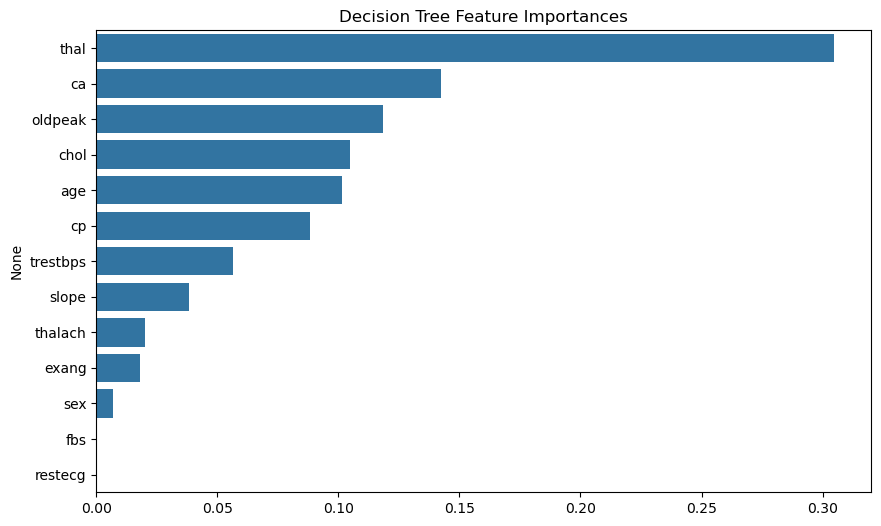

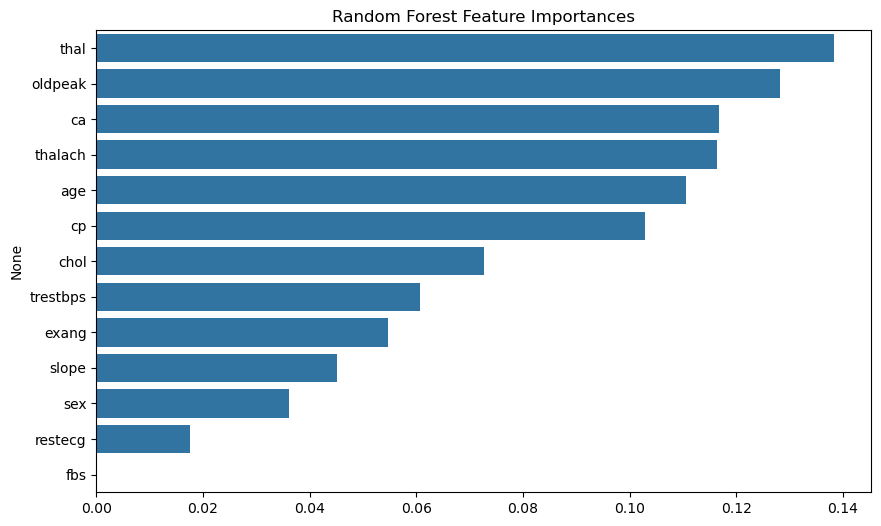

In [47]:
# For Decision Tree
dt_importances = dt_model.feature_importances_
dt_feat_imp = pd.Series(dt_importances, index=x.columns).sort_values(ascending=False)

# For Random Forest
rf_importances = rf_model.feature_importances_
rf_feat_imp = pd.Series(rf_importances, index=x.columns).sort_values(ascending=False)

plt.figure(figsize=(10,6))
sns.barplot(x=dt_feat_imp.values, y=dt_feat_imp.index)
plt.title("Decision Tree Feature Importances")
plt.show()

plt.figure(figsize=(10,6))
sns.barplot(x=rf_feat_imp.values, y=rf_feat_imp.index)
plt.title("Random Forest Feature Importances")
plt.show()


# 5 - Evaluate using cross-validation

In [52]:
from sklearn.model_selection import cross_val_score

dt_cv_scores = cross_val_score(DecisionTreeClassifier(max_depth=4, random_state=42), x, y, cv=5)
rf_cv_scores = cross_val_score(RandomForestClassifier(random_state=42), x, y, cv=5)

print(f"Decision Tree CV Accuracy: {dt_cv_scores.mean():.4f} ± {dt_cv_scores.std():.4f}")
print(f"Random Forest CV Accuracy: {rf_cv_scores.mean():.4f} ± {rf_cv_scores.std():.4f}")


Decision Tree CV Accuracy: 0.8726 ± 0.0139
Random Forest CV Accuracy: 1.0000 ± 0.0000
